In [1]:
import cv2
from matplotlib import pyplot
import numpy
from scipy.fftpack import dct
from scipy.fftpack import idct
import struct
import zlib

pyplot.rcParams["figure.figsize"] = (15, 3)

# Zadanie 1

In [2]:
#
# PPM file header
#
ppm_ascii_header = 'P3 3 1 255 '
ppm_binary_header = 'P6 3 1 255 '

#
# Image data
#
image = numpy.array([[0, 0, 255, 0, 0, 255, 0, 0, 255]], dtype=numpy.uint8)

#
# Save the PPM image as an ASCII file
#
with open('images/lab4-ascii.ppm', 'w') as fh:
    fh.write(ppm_ascii_header)
    image.tofile(fh, sep=' ')
    fh.write('\n')

#
# Save the PPM image as a binary file
#
with open('images/lab4-binary.ppm', 'wb') as fh:
    fh.write(bytearray(ppm_binary_header, 'ascii'))
    image.tofile(fh)

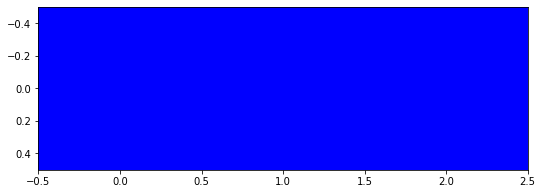

In [3]:
#
# Display image
#
image_from_file = cv2.imread('images/lab4-ascii.ppm')
pyplot.imshow(cv2.cvtColor(image_from_file, cv2.COLOR_BGR2RGB))

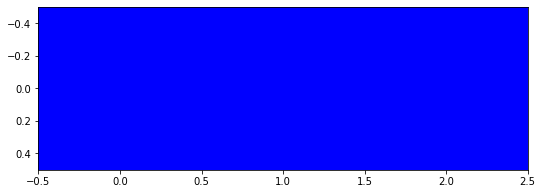

In [4]:
#
# Display image
#
image_from_file = cv2.imread('images/lab4-binary.ppm')
pyplot.imshow(cv2.cvtColor(image_from_file, cv2.COLOR_BGR2RGB))

# Zadanie 2

In [49]:

rainbow = []

rainbow.extend([[0, 0, i] for i in range(255)])
rainbow.extend([[0, i, 255] for i in range(255)])
rainbow.extend([[0, 255, 255 - i] for i in range(255)])
rainbow.extend([[i, 255, 0] for i in range(255)])
rainbow.extend([[255, 255 - i, 0] for i in range(255)])
rainbow.extend([[255, 0, i] for i in range(255)])
rainbow.extend([[255, i, 255] for i in range(256)])

height = 60
width = len(rainbow)

header = f'P6 {width} {height} 255 '

data = rainbow * height
data = [data]

array = numpy.asarray(data, dtype=numpy.uint8)

with open('images/lab4-rainbow.ppm', 'wb') as fh:
    fh.write(bytearray(header, 'ascii'))
    array.tofile(fh)


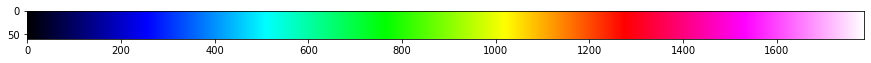

In [50]:
#
# Display image
#
image_from_file = cv2.imread('images/lab4-rainbow.ppm')
pyplot.imshow(cv2.cvtColor(image_from_file, cv2.COLOR_BGR2RGB))

# Zadanie 3

In [51]:
def save_as_png(image, file_name):
    #
    # Construct signature
    #
    png_file_signature = b'\x89PNG\r\n\x1a\n'

    #
    # Construct header
    #

    header_id = b'IHDR'
    header_content = struct.pack('!IIBBBBB', image.shape[1], image.shape[0], 8, 2, 0, 0, 0)
    header_size = struct.pack('!I', len(header_content))
    header_crc = struct.pack('!I', zlib.crc32(header_id + header_content))
    png_file_header = header_size + header_id + header_content + header_crc
    #
    # Construct data
    #
    data_id = b'IDAT'
    data_content = zlib.compress(b''.join([b'\x00' + bytes(row) for row in image]))
    data_size = struct.pack('!I', len(data_content))
    data_crc = struct.pack('!I', zlib.crc32(data_id + data_content))
    png_file_data = data_size + data_id + data_content + data_crc

    #
    # Construct end
    #
    end_id = b'IEND'
    end_content = b''
    end_size = struct.pack('!I', len(end_content))
    end_crc = struct.pack('!I', zlib.crc32(end_id + end_content))
    png_file_end = end_size + end_id + end_content + end_crc

    #
    # Save the PNG image as a binary file
    #
    with open(file_name, 'wb') as fh:
        fh.write(png_file_signature)
        fh.write(png_file_header)
        fh.write(png_file_data)
        fh.write(png_file_end)

#
# Image data
#

rainbow_array = numpy.asarray(rainbow).reshape(len(rainbow), 3)


array_zad3 = [rainbow_array] * height
image = numpy.array(array_zad3,
                    dtype=numpy.uint8)

save_as_png(image, 'images/lab4.png')

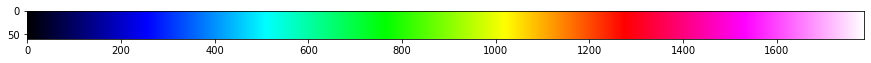

In [52]:
#
# Display image
#
image_from_file = cv2.imread('images/lab4.png')
pyplot.imshow(cv2.cvtColor(image_from_file, cv2.COLOR_BGR2RGB))

# Funkcje pomocnicze do zadań 4 i 5

In [53]:
#
# 2d Discrete Cosinus Transform
#
def dct2(array):
    return dct(dct(array, axis=0, norm='ortho'), axis=1, norm='ortho')


def idct2(array):
    return idct(idct(array, axis=0, norm='ortho'), axis=1, norm='ortho')


#
# Calculate quantisation matrices
#
# Based on: https://www.hdm-stuttgart.de/~maucher/Python/MMCodecs/html/jpegUpToQuant.html
#           #step-3-and-4-discrete-cosinus-transform-and-quantisation
#
_QY = numpy.array([[16, 11, 10, 16, 24, 40, 51, 61],
                   [12, 12, 14, 19, 26, 48, 60, 55],
                   [14, 13, 16, 24, 40, 57, 69, 56],
                   [14, 17, 22, 29, 51, 87, 80, 62],
                   [18, 22, 37, 56, 68, 109, 103, 77],
                   [24, 35, 55, 64, 81, 104, 113, 92],
                   [49, 64, 78, 87, 103, 121, 120, 101],
                   [72, 92, 95, 98, 112, 100, 103, 99]])

_QC = numpy.array([[17, 18, 24, 47, 99, 99, 99, 99],
                   [18, 21, 26, 66, 99, 99, 99, 99],
                   [24, 26, 56, 99, 99, 99, 99, 99],
                   [47, 66, 99, 99, 99, 99, 99, 99],
                   [99, 99, 99, 99, 99, 99, 99, 99],
                   [99, 99, 99, 99, 99, 99, 99, 99],
                   [99, 99, 99, 99, 99, 99, 99, 99],
                   [99, 99, 99, 99, 99, 99, 99, 99]])


def _scale(QF):
    if QF < 50 and QF >= 1:
        scale = numpy.floor(5000 / QF)
    elif QF < 100:
        scale = 200 - 2 * QF
    else:
        raise ValueError('Quality Factor must be in the range [1..99]')

    scale = scale / 100.0
    return scale


def QY(QF=85):
    return _QY * _scale(QF)


def QC(QF=85):
    return _QC * _scale(QF)

# Zadania 4 i 5

In [60]:
import math

#
# 0. Image data
#
image_jpeg = image.copy()
#
# 1. Convert RGB to YCbCr
#
image_YCrCb = cv2.cvtColor(image_jpeg, cv2.COLOR_RGB2YCrCb)
y_pad = 8 - (image.shape[0] % 8)
x_pad = 8 - (image.shape[1] % 8)
image_YCrCb = numpy.pad(
    image_YCrCb, ((0, y_pad), (0, x_pad) ,(0, 0)), mode='constant')
#
# 2. Downsampling on Cb and Cr channels
#
matrix_Y = image_YCrCb[:, :, 0]
matrix_Cr = image_YCrCb[:, :, 1]
matrix_Cb = image_YCrCb[:, :, 2]

matrix_Cr = matrix_Cr[::2, ::2]
matrix_Cb = matrix_Cb[::2, ::2]
#
# 3. Produce 8x8 blocks
#
block_Y = []
for i in range(0, matrix_Y.shape[0], 8):
    for j in range(0, matrix_Y.shape[1], 8):
        block_Y.append(matrix_Y[i:i + 8, j: j + 8])
block_Cr = []
block_Cb = []
for i in range(0, matrix_Cr.shape[0], 8):
    for j in range(0, matrix_Cr.shape[1], 8):
        block_Cr.append(matrix_Cr[i:i + 8, j: j + 8])
        block_Cb.append(matrix_Cb[i:i + 8, j: j + 8])
# 4. Calculate DCT on each block
#
# TODO: implement (zad. 5)

#
# 5. Divide each block by quantisation matrix
#
# TODO: implement (zad. 5)

#
# 6. Round values in each block to integers
#
# TODO: implement (zad. 5)

#
# 7. Zig Zag
#
# TODO: implement (zad. 4)

#
# 8. Flatten, concatenate, compress and calculate the size -- how many bytes?
#
# TODO: implement (zad. 4)

#
# 7'. Undo Zig Zag
#
# We can skip it in this exercise! We did Zig Zag only for analysis in step 8.
# You can continue with result from step 6. instead of implementing undo here.
#

#
# 6'. Nothing to do here   ¯\_(ツ)_/¯
#
# No conversion is really needed here, just proceed to the next step.
#

#
# 5'. Reverse division by quantisation matrix -- multiply
#
# TODO: implement (zad. 5)

#
# 4'. Reverse DCT
#
# TODO: implement (zad. 5)

#
# 3'. Combine 8x8 blocks to original image
#
step_Y = int(matrix_Y.shape[1] / 8)
rows = []
for i in range(0, len(block_Y), step_Y):
    rows.append(numpy.concatenate(block_Y[i:i + step_Y], axis=1))
matrix_Y = numpy.concatenate(rows, axis=0)

step_C = int(matrix_Cr.shape[1] / 8)
rows_Cr = []
rows_Cb = []
for i in range(0, len(block_Cr), step_C):
    rows_Cr.append(numpy.concatenate(block_Cr[i:i + step_C], axis=1))
    rows_Cb.append(numpy.concatenate(block_Cb[i:i + step_C], axis=1))
matrix_Cr = numpy.concatenate(rows_Cr, axis=0)
matrix_Cb = numpy.concatenate(rows_Cb, axis=0)
#
# 2'. Upsampling on Cb and Cr channels
#
upsampled_Cr = numpy.empty((matrix_Cr.shape[0] * 2, matrix_Cr.shape[1] * 2), dtype=numpy.uint8)
upsampled_Cb = numpy.empty((matrix_Cb.shape[0] * 2, matrix_Cb.shape[1] * 2), dtype=numpy.uint8)
upsampled_Cr[::2, ::2] = matrix_Cr
upsampled_Cr[::2, 1::2] = matrix_Cr
upsampled_Cr[1::2, :] = upsampled_Cr[::2, :]
upsampled_Cb[::2, ::2] = matrix_Cb
upsampled_Cb[::2, 1::2] = matrix_Cb
upsampled_Cb[1::2, :] = upsampled_Cb[::2, :]
image_jpeg = numpy.empty((matrix_Y.shape[0], matrix_Y.shape[1], 3), dtype=numpy.uint8)
image_jpeg[:, :, 0] = matrix_Y
image_jpeg[:, :, 1] = upsampled_Cr
image_jpeg[:, :, 2] = upsampled_Cb
#
# 1'. Convert YCbCr to RGB
#
image_jpeg = cv2.cvtColor(image_YCrCb, cv2.COLOR_YCrCb2RGB)
#
# 0'. Save the decoded image -- as PPM or PNG
#
save_as_png(image_jpeg, 'images/lab4-po-kompresji-i-dekompresji-jpeg.png')

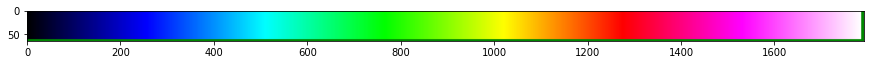

In [61]:
#
# Display image
#
image_from_file = cv2.imread('images/lab4-po-kompresji-i-dekompresji-jpeg.png')
pyplot.imshow(cv2.cvtColor(image_from_file, cv2.COLOR_BGR2RGB))

# Obserwacje z zadań 4 i 5